# Sınıflandırma Problemleri

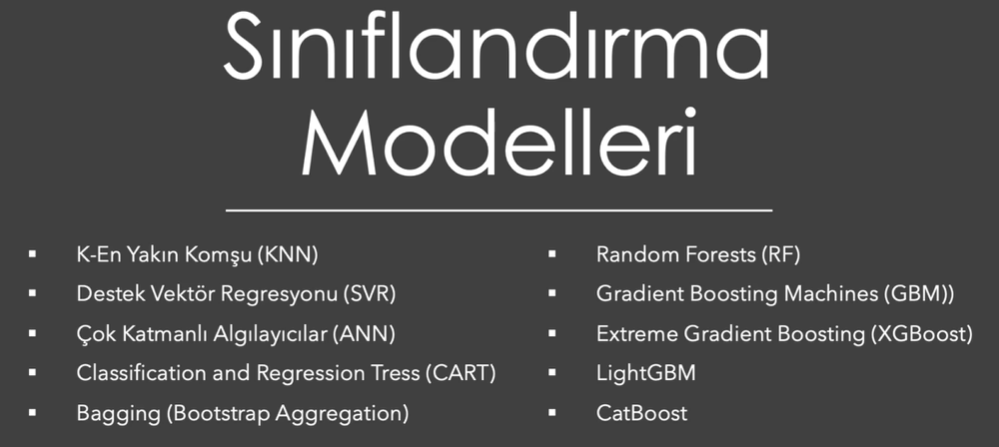

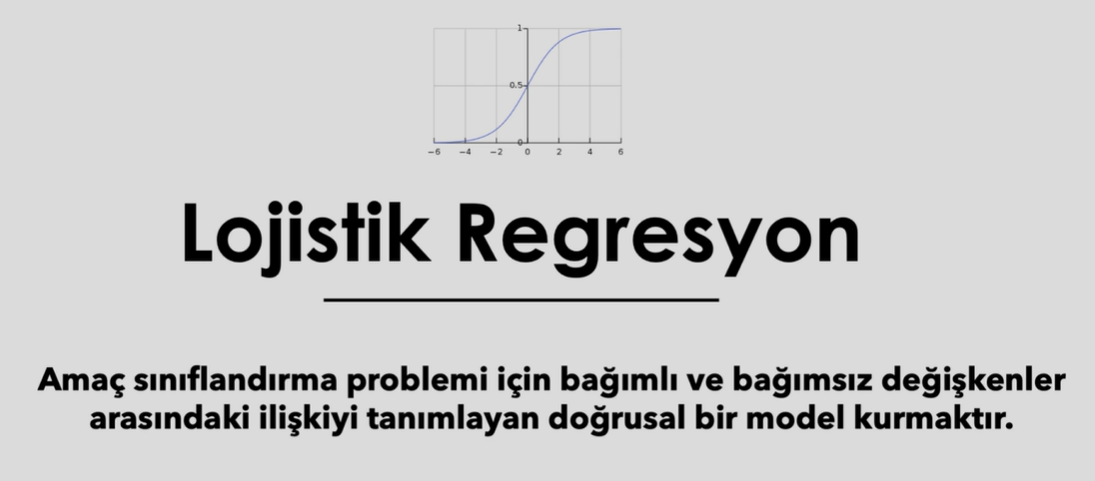

Yanıt değişkeninin 2 den fazla değer alacağı durumlarda doğrusal regresyon modeli kullanılamaz. Lojistik Regresyon ile ilgilenilen değerlerin 0-1 arasında olması güvence altına alınmış olur.

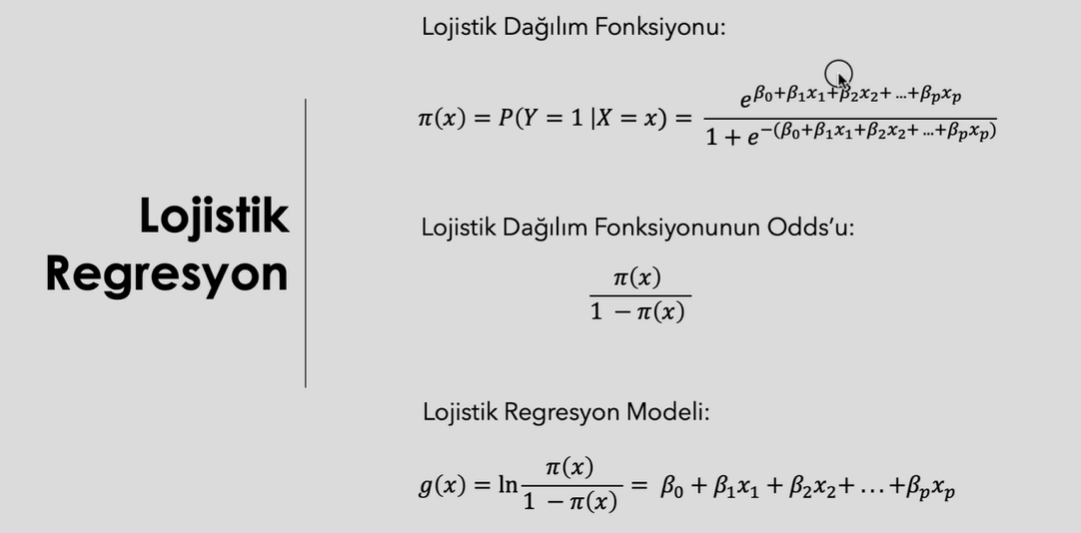

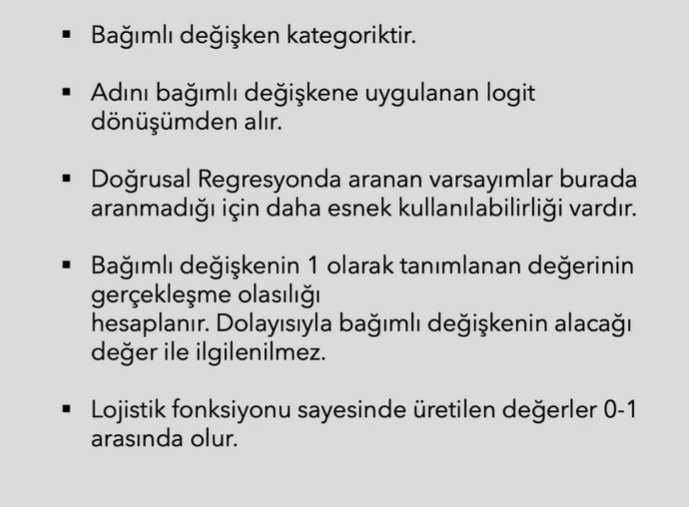

In [6]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'catboost'

In [ ]:
# Lojistik Regresyon 

## Model 
Bir kişi geldiğinde bulunan değerlere göre kişinin şeker hastası olup olmadığını tahmin etmeye yarayan bir model geliştirmek.

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()  # bağımlı değişken.

0    500
1    268
Name: Outcome, dtype: int64

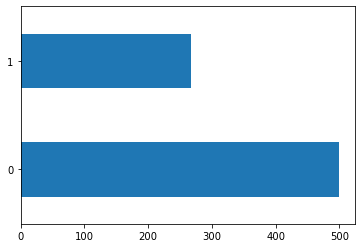

In [7]:
df["Outcome"].value_counts().plot.barh();

In [8]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [9]:
y = df["Outcome"]  #  bağımlı değişken
X = df.drop(["Outcome"], axis=1)  # bağımsız değişkenler

In [ ]:
# statsmodels

In [10]:
loj = sm.Logit(y, X)  # bir logit modeli kuruyoruz. statsmodelin sağladığı güzel çıktılar var.
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 03 Jan 2022   Pseudo R-squ.:                 0.05922
Time:                        20:23:18   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [ ]:
# scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [12]:
loj_model.intercept_  

array([-5.87567981])

In [13]:
loj_model.coef_  

array([[ 1.17026040e-01,  2.83447017e-02, -1.69142223e-02,
         7.58028032e-04, -6.38933355e-04,  5.95883532e-02,
         6.74657098e-01,  7.19078501e-03]])

## Tahmin & Model Tuning

In [14]:
y_pred = loj_model.predict(X)  # confusion matriksi ve accuracy score nasıl erişebileceğimize ilişkin bir işlem.

In [15]:
confusion_matrix(y, y_pred)  # gerçekte 1 iken 1 olanlar, 1 iken 0 olanlar; 0 iken 1 olanlar ve 0 iken 0 olanlar.

array([[448,  52],
       [121, 147]], dtype=int64)

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [18]:
loj_model.predict(X)[0:10]  # kurduğumuz model ile bir tahmin yaptığımızda bize 1 ve 0 değerleri döndürüyor.

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
loj_model.predict_proba(X)[0:10][:,0:2]  # aşağıdak her bir satırdaki gerçek değerin 0. indeks 0, 1. indeks ise 1 içindir.

# yukarıdaki tahminin doğru olup olmadığını inceliyoruz.

array([[0.35093834, 0.64906166],
       [0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

In [20]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [23]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [24]:
y_probs

array([0.64906166, 0.0832535 , 0.77503825, 0.07894036, 0.83192542,
       0.20142284, 0.12026945, 0.72244596, 0.67931064, 0.0776061 ,
       0.22085999, 0.84237055, 0.70646076, 0.63342021, 0.59858418,
       0.53052758, 0.32315066, 0.24653578, 0.39415768, 0.25486154,
       0.36592034, 0.30504097, 0.87517302, 0.34028983, 0.62848418,
       0.47158784, 0.65815082, 0.08831122, 0.55251097, 0.26938288,
       0.37640288, 0.54923933, 0.09785089, 0.06862956, 0.44286861,
       0.21730353, 0.6343818 , 0.38963664, 0.19795012, 0.4938542 ,
       0.70369512, 0.60435043, 0.14955883, 0.83324807, 0.61928188,
       0.89082513, 0.44801101, 0.07105057, 0.39074683, 0.15421016,
       0.0697281 , 0.14562779, 0.11806122, 0.7504974 , 0.67837711,
       0.05526484, 0.83777808, 0.29032775, 0.69146293, 0.21520759,
       0.05192809, 0.50890023, 0.04985652, 0.37183519, 0.3749667 ,
       0.16513771, 0.18768626, 0.35311988, 0.06763277, 0.33034615,
       0.22809256, 0.41882601, 0.7263702 , 0.27882477, 0.08068

In [25]:
y_probs[0:10]

array([0.64906166, 0.0832535 , 0.77503825, 0.07894036, 0.83192542,
       0.20142284, 0.12026945, 0.72244596, 0.67931064, 0.0776061 ])

In [26]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]  # bir dönüştürme işlemi yaptık.

In [27]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [28]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [29]:
accuracy_score(y, y_pred)

0.7747395833333334

In [30]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [31]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64906166, 0.0832535 , 0.77503825, 0.07894036, 0.83192542])

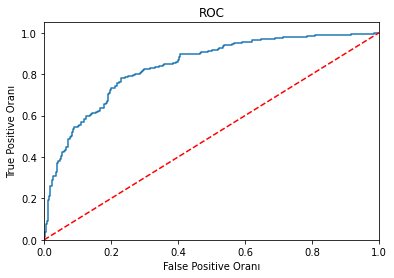

In [32]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X)) # y gerçek ve pred değerlerini koyduk.

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# kırmızı çizgi, hiçbir işlem yapmasaydım çıkacak olan buydu zaten.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [34]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)  # train ve test üzerinden bir model kurduk.
loj_model

LogisticRegression(solver='liblinear')

In [35]:
accuracy_score(y_test, loj_model.predict(X_test)) # train hatasına bakmadan direkt test hatası üzerinden gittik.

# test hatası

0.7532467532467533

In [36]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Gaussian Naive Bayes

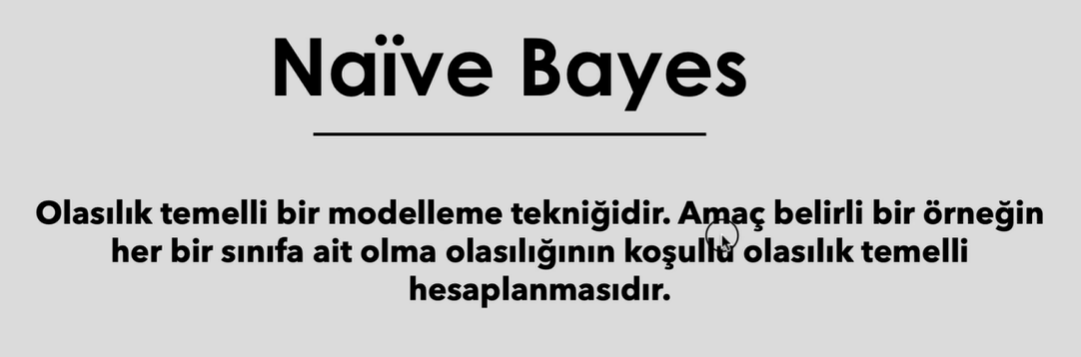

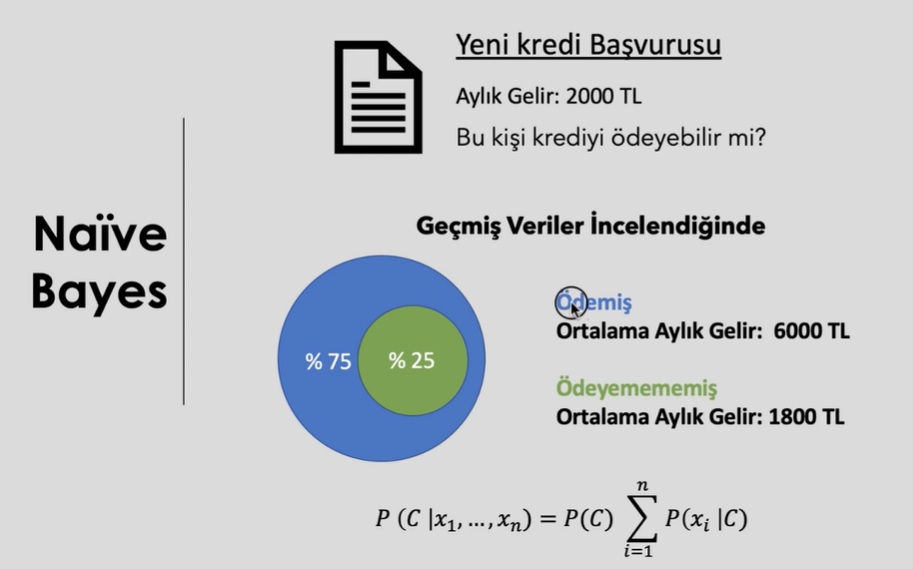

In [37]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]  # bağımlı
X = df.drop(['Outcome'], axis=1)   # bağımsızlar
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [40]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [42]:
y_pred = nb_model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [44]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 

# lojistik regresyano göre bir tık daha iyi diyebiliriz.

0.775

# KNN

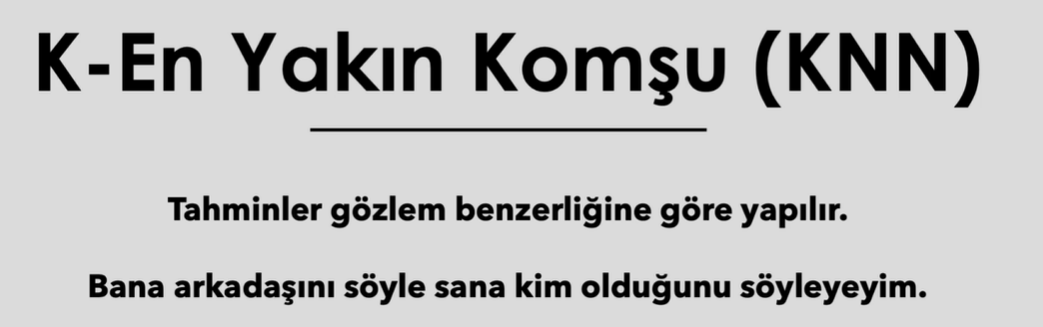

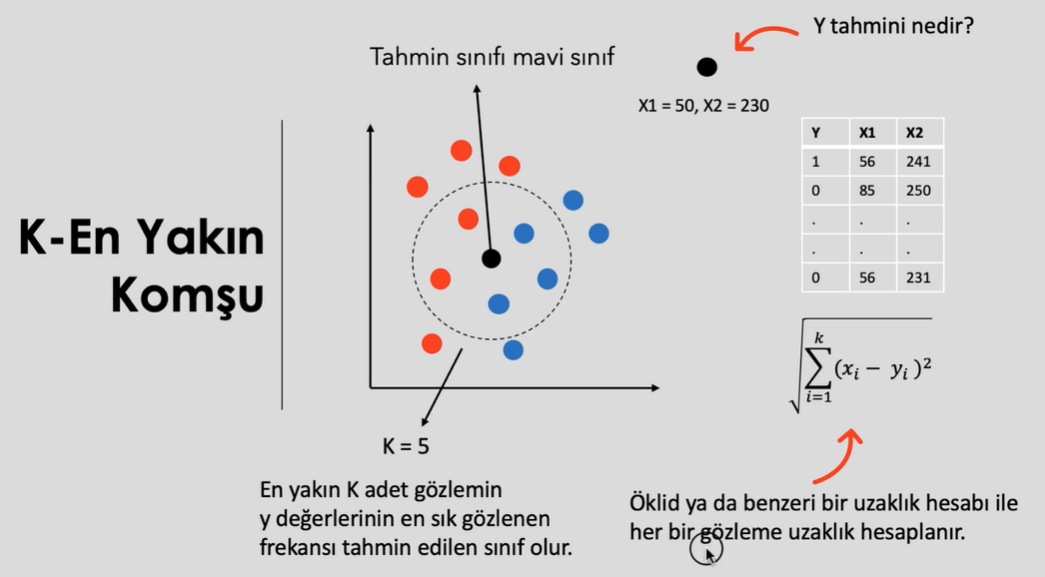

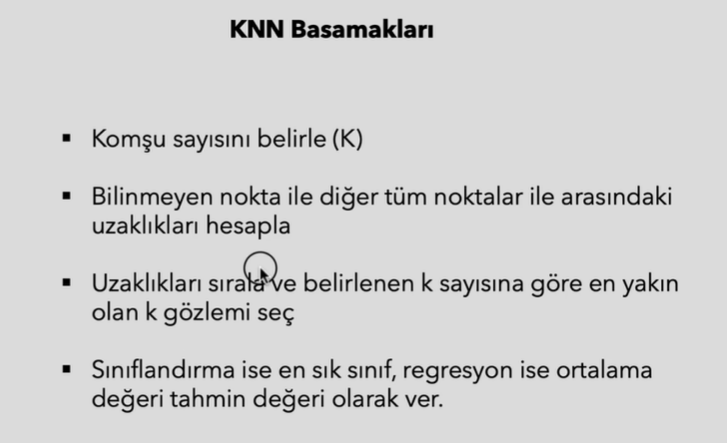

## Model & Tahmin

In [45]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [46]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [47]:
y_pred = knn_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [51]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [52]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [54]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [55]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [56]:
y_pred = knn_tuned.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)  # yukarıdaki knn score değerini doğrulamak için.

0.7316017316017316

# SVC

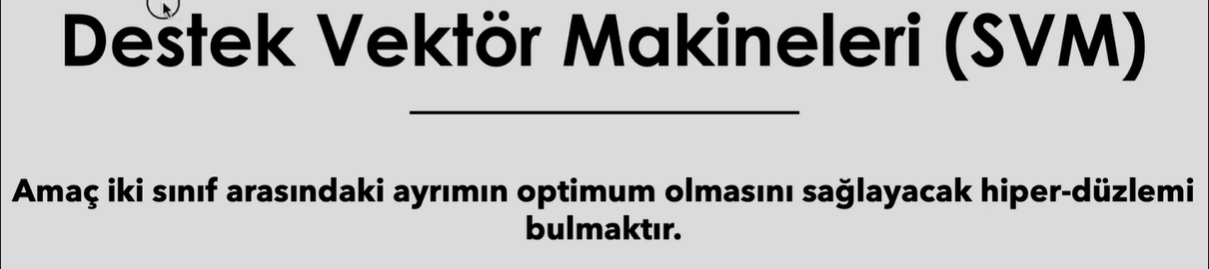

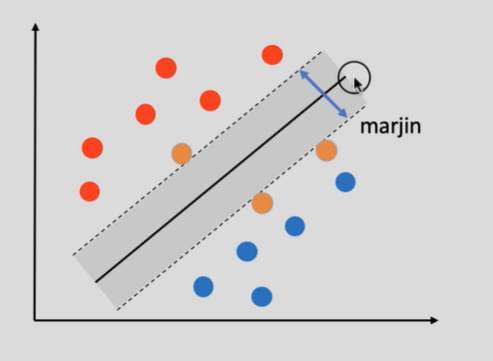

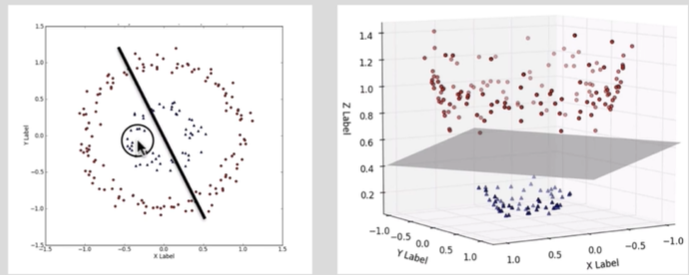

## Model & Tahmin

In [58]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [59]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [60]:
svm_model

SVC(kernel='linear')

In [61]:
y_pred = svm_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)  # 1 e yakın oldukça sınıflandırma işlemimizin başarılı olduğunu gösterir.

0.7445887445887446

## Model Tuning

In [63]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                           #  n_jobs = -1,   # n_jobs ten dolayı uzun sürüyor.
                            verbose = 2 )  

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [64]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [70]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [71]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC
Radial Bases Function SVC

## Model & Tahmin

In [72]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [73]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [74]:
svc_model

SVC()

In [75]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [76]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [81]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [82]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [83]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [84]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

## Model & Tahmin

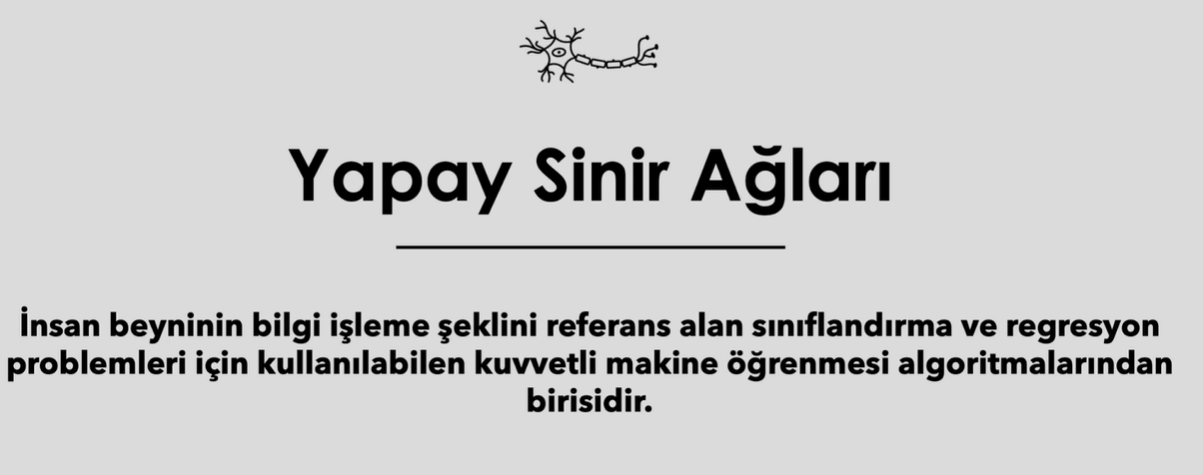

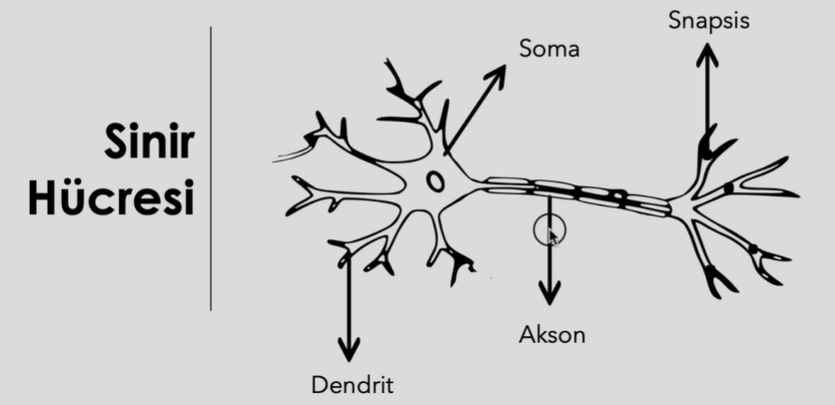

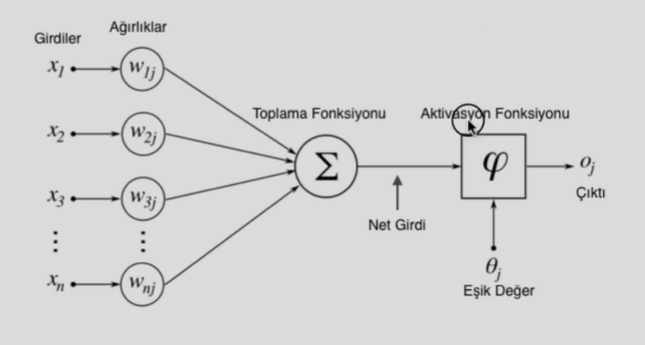

In [85]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler  

In [87]:
scaler = StandardScaler() # burada bir standartlaştırma işlemi gerçekleştiriyoruz.

In [88]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [94]:
mlpc.coefs_

[array([[-8.84573925e-02,  8.22121407e-02, -6.78874929e-02,
          2.99439482e-01, -3.36680122e-01, -1.75849432e-01,
          2.37640543e-01, -2.59789580e-01, -3.97708944e-01,
         -2.49480537e-02,  1.61612534e-01, -1.19772308e-01,
         -6.89662256e-03,  1.22084281e-01,  1.37419419e-01,
          1.37319645e-02, -3.13463405e-01, -2.04134863e-01,
          1.01313320e-01,  4.20726980e-01,  1.95108924e-01,
          6.92297152e-02, -8.69980040e-02, -2.33662692e-01,
          1.37006011e-01, -1.13894995e-02, -1.08711471e-01,
          1.39555580e-02, -1.15661302e-01,  5.71164234e-02,
          1.14318814e-01,  3.60841112e-02,  2.53457843e-01,
         -1.97273260e-01,  5.23646193e-02, -5.15473862e-02,
          3.83278763e-01, -3.17455046e-01,  2.07542119e-01,
          1.23884338e-01, -1.88560965e-01,  5.20235023e-02,
         -3.80900732e-01, -4.01964889e-01, -2.66897305e-01,
         -1.77422469e-01,  4.19264757e-01,  3.79979511e-02,
         -1.05706227e-01, -4.28725573e-0

In [92]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [95]:
mlpc

MLPClassifier()

In [96]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam

In [97]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [98]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [104]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [105]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                           solver = "sgd")

In [106]:
mlpc_tuned.fit(X_train_scaled, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver='sgd')

In [107]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

# CART

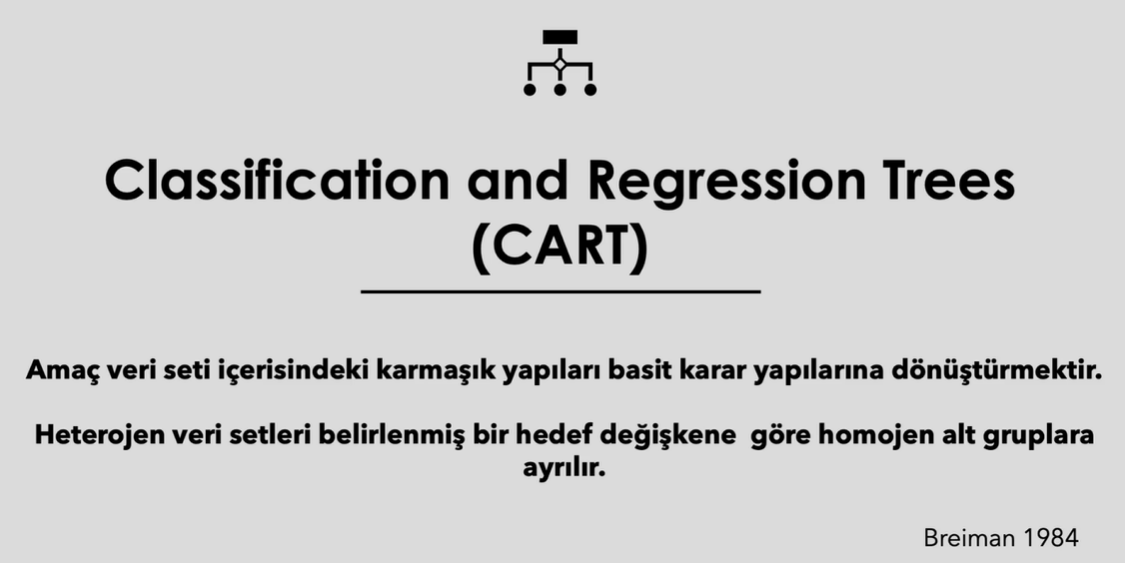

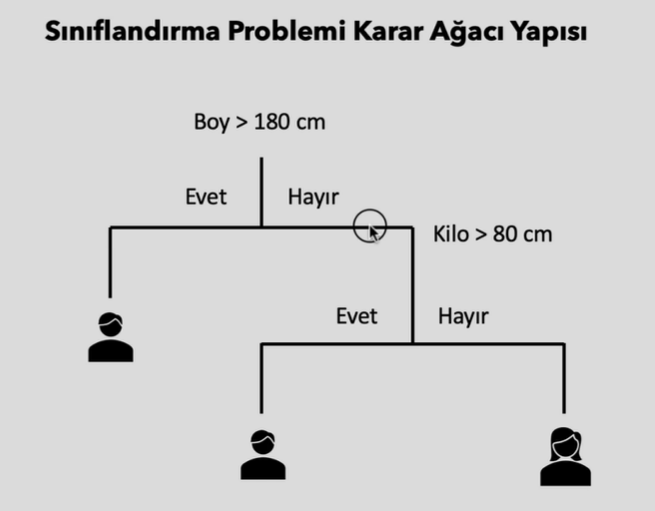

## Model & Tahmin

In [151]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
# X = df.drop(['Outcome'], axis=1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
cart = DecisionTreeClassifier(max_depth=2)  # eğer derinliğe değer girmezsek aşağıda daha karmaşık bir yapı çıkacak.
cart_model = cart.fit(X_train, y_train)

In [154]:
cart_model

DecisionTreeClassifier(max_depth=2)

In [124]:
!pip install astor

In [155]:
!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code")) # tahmin func çıkarıp python code dönüştürür.

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [148]:
x = [8]  # x verdiğimiz değerleri oluşturulan kural setine uygulayınca bize hangi sınıfa ait olduğunu söyler.

In [149]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.50 else 1)

1

In [ ]:
# ((0 if x[0] <= 28.5 else 0) if x[0] <= 154.5 else 1 if x[0] <= 28.70 else 1) mesela yukarıda df.drop yapmayıp yerine bağımsız değişkene sadece pregnance atarsak sonuç bu çıkar.

In [115]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

## Model Tuning

In [164]:
cart_model

DecisionTreeClassifier(max_depth=2)

In [ ]:
?cart_model

In [165]:
cart_grid = {"max_depth": range(1,10),  # böylede bırakılabilir listeye de çevrilebilir.
            "min_samples_split" : list(range(2,50)) }

In [166]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [167]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2}


In [ ]:
# final modelimizi kuruyoruz.

In [170]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [171]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.658008658008658

# Random Forests

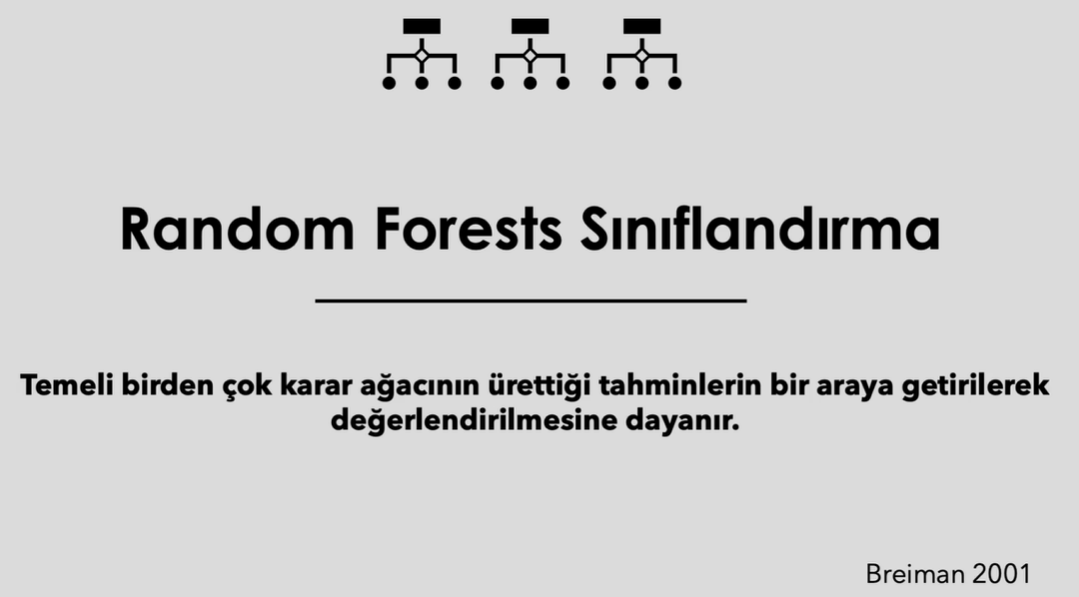

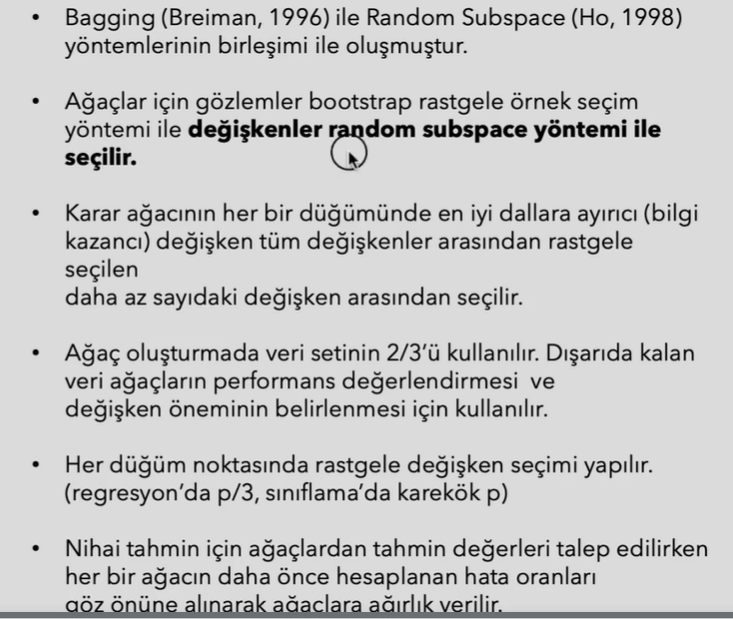

In [172]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [175]:
rf_model

RandomForestClassifier()

In [176]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [177]:
rf_model

RandomForestClassifier()

In [ ]:
?rf_model

In [178]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [179]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [180]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [181]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 1000}


In [ ]:
#final

In [182]:
rf_tuned = RandomForestClassifier(max_depth = 9, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=5, min_samples_split=5,
                       n_estimators=1000)

In [183]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [184]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

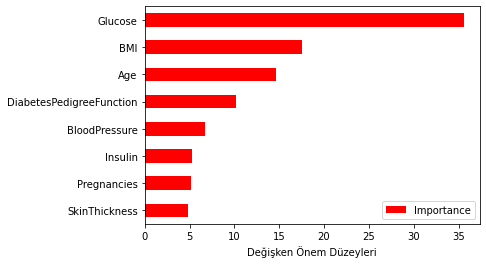

In [185]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

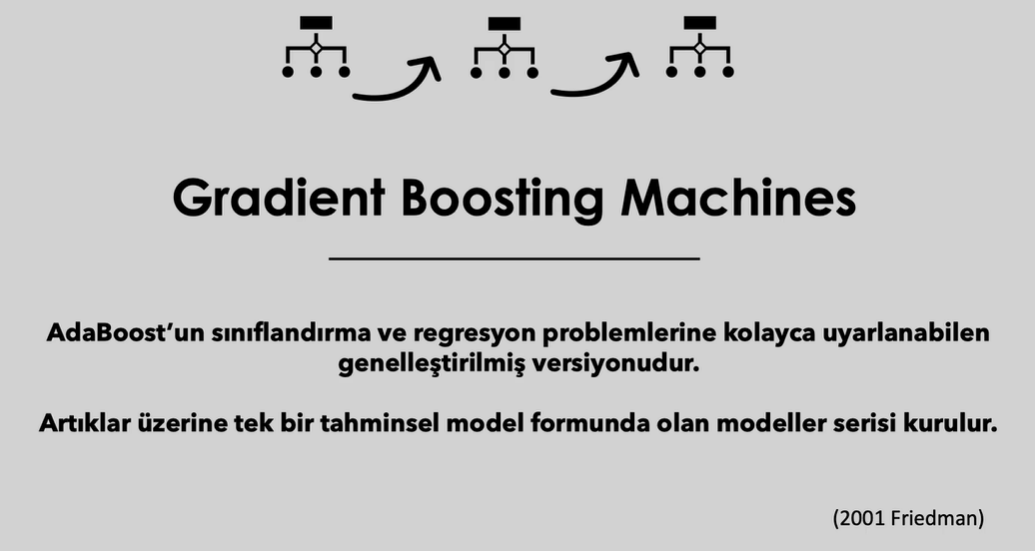

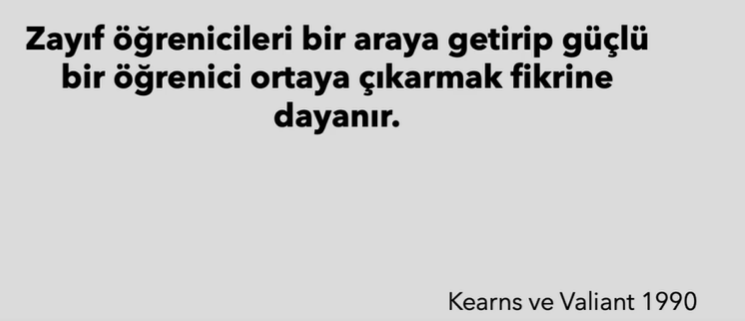

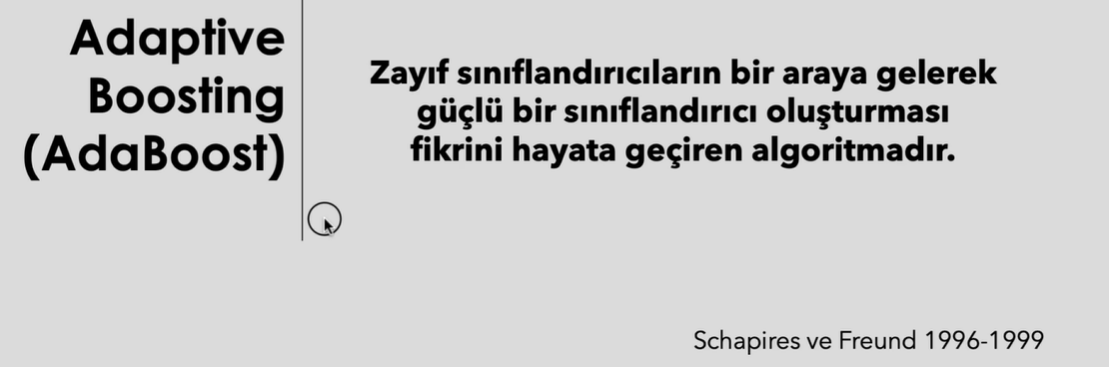

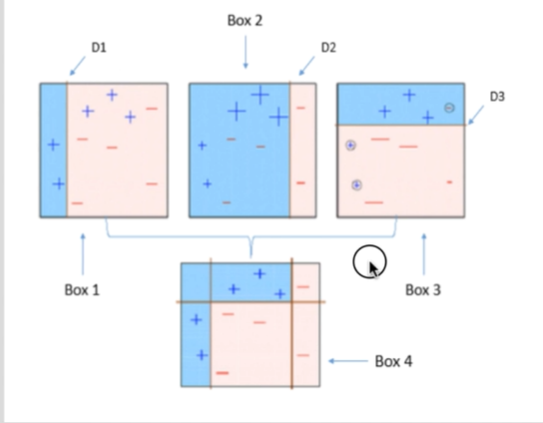

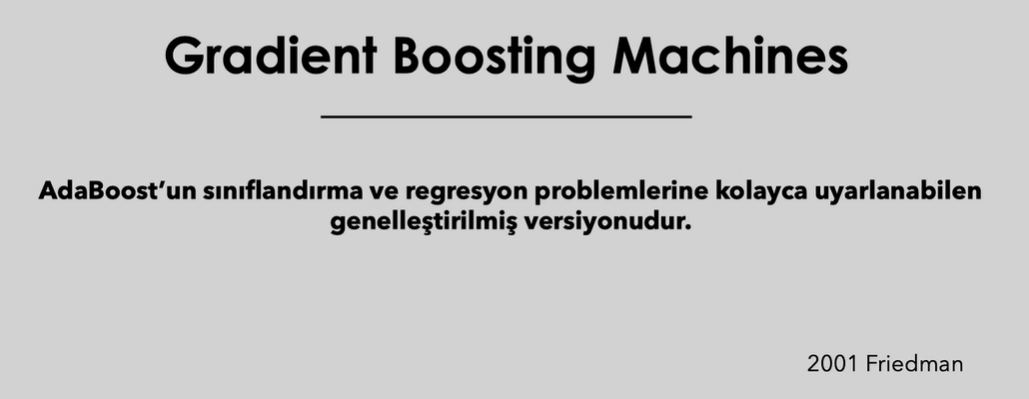

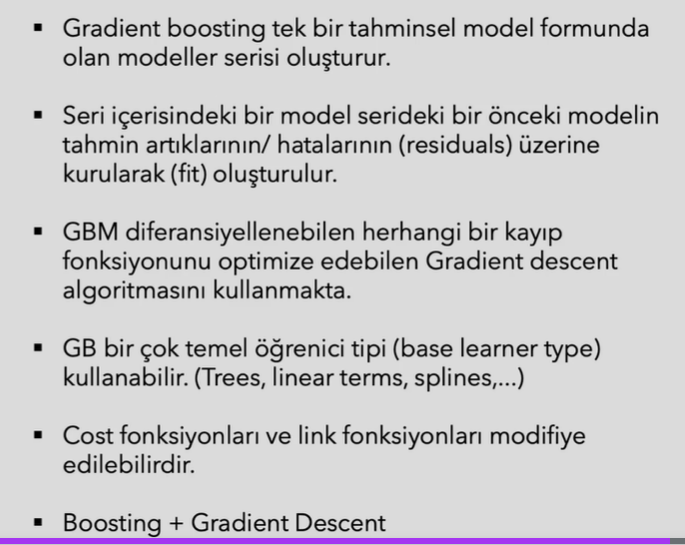

In [186]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [189]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [190]:
gbm_model

GradientBoostingClassifier()

In [ ]:
?gbm_model

In [191]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [192]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [193]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [194]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [195]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                 min_samples_split = 5,
                                 n_estimators = 100)

In [196]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [197]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# XGBoost

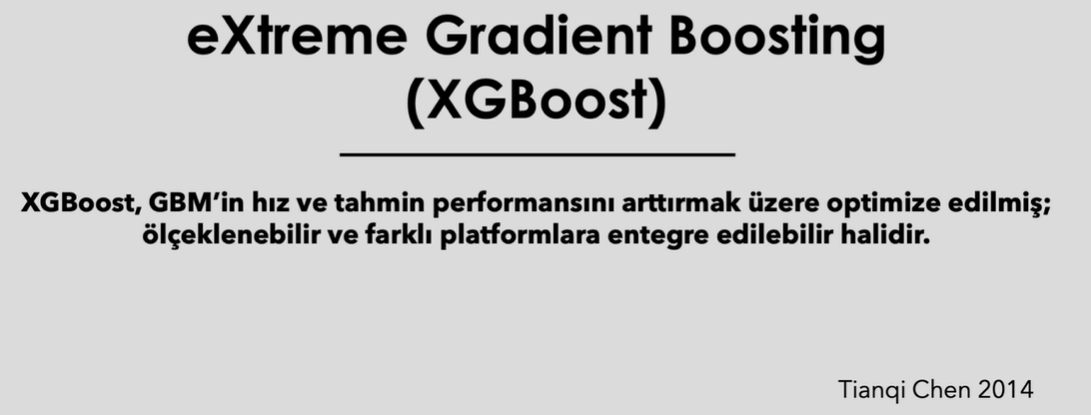

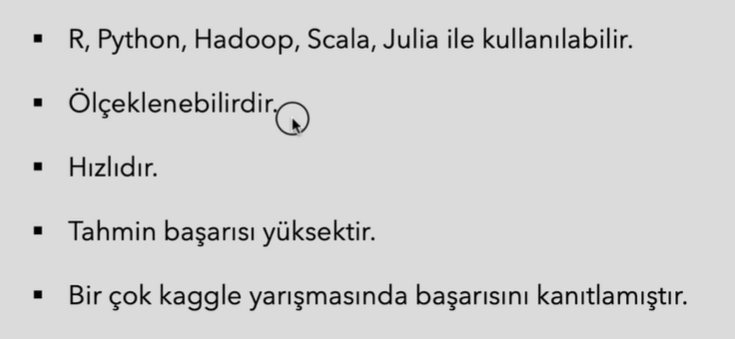

In [198]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [199]:
#!pip install xgboost
from xgboost import XGBClassifier

In [200]:
xgb_model = XGBClassifier().fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [201]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [203]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
?xgb_model

In [204]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [219]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [220]:
xgb_cv_model.fit(X_train, y_train)  # parametre  sayısı fazla olduğundan dolayı uzun sürüyor.

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[01:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [221]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [222]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [223]:
xgb_tuned =  xgb.fit(X_train,y_train)

[01:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [224]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

# LightGBM

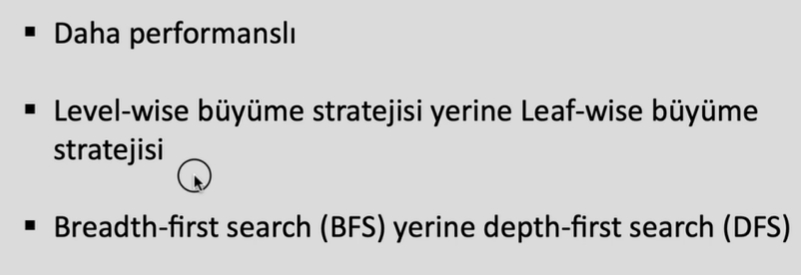

In [205]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [206]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [207]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [208]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [ ]:
## Model Tuning

In [209]:
lgbm_model

LGBMClassifier()

In [ ]:
?lgbm_model

In [210]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [227]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 5,   # cok u
                             n_jobs = -1, 
                             verbose = 2)



In [228]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [229]:
lgbm_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 5,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [230]:
lgbm = LGBMClassifier(learning_rate = 0.02, 
                       max_depth = 5,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20)

In [231]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [232]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

# CatBoost

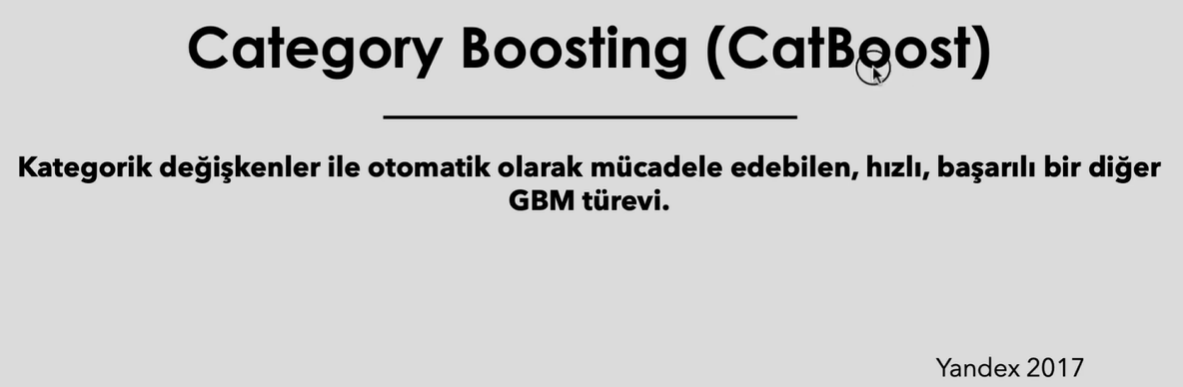

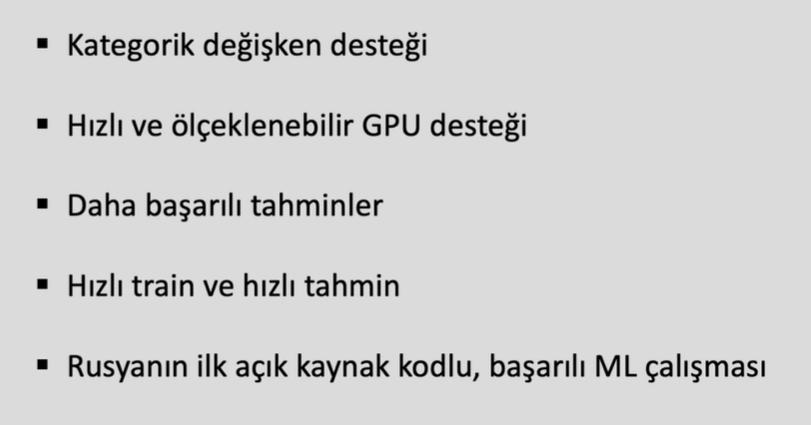

## Model & Tahmin

In [211]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [213]:
# !pip install catboost
from catboost import CatBoostClassifier

In [214]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 125ms	remaining: 2m 4s
1:	learn: 0.6843414	total: 131ms	remaining: 1m 5s
2:	learn: 0.6805760	total: 137ms	remaining: 45.5s
3:	learn: 0.6765782	total: 142ms	remaining: 35.5s
4:	learn: 0.6720829	total: 149ms	remaining: 29.6s
5:	learn: 0.6681617	total: 153ms	remaining: 25.4s
6:	learn: 0.6641912	total: 159ms	remaining: 22.5s
7:	learn: 0.6602881	total: 165ms	remaining: 20.4s
8:	learn: 0.6562626	total: 170ms	remaining: 18.8s
9:	learn: 0.6528483	total: 178ms	remaining: 17.6s
10:	learn: 0.6487823	total: 184ms	remaining: 16.6s
11:	learn: 0.6454980	total: 187ms	remaining: 15.4s
12:	learn: 0.6418953	total: 191ms	remaining: 14.5s
13:	learn: 0.6374431	total: 197ms	remaining: 13.9s
14:	learn: 0.6339676	total: 202ms	remaining: 13.2s
15:	learn: 0.6304252	total: 207ms	remaining: 12.8s
16:	learn: 0.6266998	total: 211ms	remaining: 12.2s
17:	learn: 0.6237660	total: 215ms	remaining: 11.7s
18:	learn: 0.6204394	total: 219ms	remaining: 11.3s
19:	learn: 0.

In [215]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [216]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [237]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)   # cok cok uzun sürdüğünden ya default değerlerini kullanalım yada aralıkları optimal tutarım.
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 6.37ms	remaining: 1.27s
1:	learn: 0.6811157	total: 14.4ms	remaining: 1.43s
2:	learn: 0.6752970	total: 20.9ms	remaining: 1.38s
3:	learn: 0.6697432	total: 30.5ms	remaining: 1.5s
4:	learn: 0.6641758	total: 36.9ms	remaining: 1.44s
5:	learn: 0.6576656	total: 42.4ms	remaining: 1.37s
6:	learn: 0.6521870	total: 47.4ms	remaining: 1.31s
7:	learn: 0.6465564	total: 54ms	remaining: 1.3s
8:	learn: 0.6407595	total: 61.1ms	remaining: 1.3s
9:	learn: 0.6357725	total: 66.1ms	remaining: 1.26s
10:	learn: 0.6299942	total: 73.8ms	remaining: 1.27s
11:	learn: 0.6240480	total: 80ms	remaining: 1.25s
12:	learn: 0.6196095	total: 85.7ms	remaining: 1.23s
13:	learn: 0.6148715	total: 92.1ms	remaining: 1.22s
14:	learn: 0.6092626	total: 98.2ms	remaining: 1.21s
15:	learn: 0.6046764	total: 104ms	remaining: 1.2s
16:	learn: 0.6012725	total: 112ms	remaining: 1.2s
17:	learn: 0.5958121	total: 119ms	remaining: 1.2s
18:	learn: 0.5903243	total

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [239]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [240]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 5.73ms	remaining: 1.14s
1:	learn: 0.6811157	total: 9.73ms	remaining: 964ms
2:	learn: 0.6752970	total: 13.6ms	remaining: 896ms
3:	learn: 0.6697432	total: 19.6ms	remaining: 960ms
4:	learn: 0.6641758	total: 23.4ms	remaining: 913ms
5:	learn: 0.6576656	total: 27.7ms	remaining: 897ms
6:	learn: 0.6521870	total: 32ms	remaining: 884ms
7:	learn: 0.6465564	total: 36.2ms	remaining: 869ms
8:	learn: 0.6407595	total: 39.8ms	remaining: 844ms
9:	learn: 0.6357725	total: 43.3ms	remaining: 822ms
10:	learn: 0.6299942	total: 46.4ms	remaining: 797ms
11:	learn: 0.6240480	total: 49.7ms	remaining: 779ms
12:	learn: 0.6196095	total: 52.8ms	remaining: 760ms
13:	learn: 0.6148715	total: 56.6ms	remaining: 751ms
14:	learn: 0.6092626	total: 60ms	remaining: 740ms
15:	learn: 0.6046764	total: 63.1ms	remaining: 725ms
16:	learn: 0.6012725	total: 67.2ms	remaining: 723ms
17:	learn: 0.5958121	total: 70.6ms	remaining: 714ms
18:	learn: 0.5903243	total: 73.9ms	remaining: 704ms
19:	learn: 0.5866024	total

In [241]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Tüm Modellerin Karşılaştırılması

In [242]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test) # tüm modellere gelen değeri soracak. Bütün modellerden bir karar alacak.
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- BMI
- BloodPressure
- DiabetesPedigreeFunction
- Glucose
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 1 features as input.

Hepsinde klasik testi kullandığından dolayı yapay sinir ağları düşük çıktı. bu problem ve bu parametreler ile catboost, random forest

In [243]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- BMI
- BloodPressure
- DiabetesPedigreeFunction
- Glucose
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 1 features as input.